# Analysis

In [113]:
import pandas as pd
import matplotlib.pyplot as plt


## 1. Loading Data

In [114]:
TechUseHigh_Sector_us = pd.read_csv('Data/TechUseHigh_Sector_us.csv')
TechUseHigh_Size_us = pd.read_csv('Data/TechUseHigh_Size_us.csv')
TechUseHigh_state = pd.read_csv('Data/TechUseHigh_state.csv')
print(TechUseHigh_Sector_us.head())
print(TechUseHigh_Size_us.columns)
print(TechUseHigh_Size_us.info())
print("==================================")
print(TechUseHigh_Size_us.head())
print(TechUseHigh_Size_us.columns)
print(TechUseHigh_Size_us.info())
print("==================================")
print(TechUseHigh_state.head())
print(TechUseHigh_state.columns)
print(TechUseHigh_state.info())


    TECHUSE                             TECHUSE_LABEL NAICS2017  \
0  T1E03B05         Artificial Intelligence: High use        00   
1  T1E03B06       Artificial Intelligence: Don't know        00   
2  T1E03BA9  Artificial Intelligence: Total Reporting        00   
3  T1E03B05         Artificial Intelligence: High use        11   
4  T1E03B06       Artificial Intelligence: Don't know        11   

                              NAICS2017_LABEL  FIRMPDEMP  
0                       Total for all sectors      20212  
1                       Total for all sectors     251786  
2                       Total for all sectors    4750687  
3  Agriculture, forestry, fishing and hunting          0  
4  Agriculture, forestry, fishing and hunting        660  
Index(['TECHUSE', 'TECHUSE_LABEL', 'NSFSZFI', 'NSFSZFI_LABEL', 'FIRMPDEMP'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  

## 2. Artificial Intelligence use by Firm Size
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Create a new column with the 'High Use' normalized to (total responses - don't know).


In [128]:
TechUseHigh_Size_us_HighUse = TechUseHigh_Size_us[TechUseHigh_Size_us['TECHUSE'] == 'T1E03B05']
TechUseHigh_Size_us_DontKnow = TechUseHigh_Size_us[TechUseHigh_Size_us['TECHUSE'] == 'T1E03B06']
TechUseHigh_Size_us_Total = TechUseHigh_Size_us[TechUseHigh_Size_us['TECHUSE'] == 'T1E03BA9']
# Reset all of the indices so the calculation works correctly
TechUseHigh_Size_us_HighUse.reset_index(drop=True, inplace=True)
TechUseHigh_Size_us_DontKnow.reset_index(drop=True, inplace=True)
TechUseHigh_Size_us_Total.reset_index(drop=True, inplace=True)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_Size_us_HighUse['NORM_FIRMS'] = TechUseHigh_Size_us_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_Size_us_Total['FIRMPDEMP'] - TechUseHigh_Size_us_DontKnow['FIRMPDEMP'])
print(TechUseHigh_Size_us_HighUse.head())
print(TechUseHigh_Size_us_HighUse.columns)
print(TechUseHigh_Size_us_HighUse.info())


    TECHUSE                      TECHUSE_LABEL  NSFSZFI  \
0  T1E03B05  Artificial Intelligence: High use        1   
1  T1E03B05  Artificial Intelligence: High use      811   
2  T1E03B05  Artificial Intelligence: High use      815   
3  T1E03B05  Artificial Intelligence: High use      857   

                     NSFSZFI_LABEL  FIRMPDEMP  NORM_FIRMS  
0                        All firms      20212    0.449265  
1          Firms with no employees       1490    0.487800  
2      Firms with 1 to 9 employees      13051    0.410768  
3  Firms with 10 employees or more       5669    0.557848  
Index(['TECHUSE', 'TECHUSE_LABEL', 'NSFSZFI', 'NSFSZFI_LABEL', 'FIRMPDEMP',
       'NORM_FIRMS'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TECHUSE        4 non-null      object 
 1   TECHUSE_LABEL  4 non-null      object 
 2   NSF

C:\Users\Darrell\AppData\Local\Temp\ipykernel_34700\2763617972.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TechUseHigh_Size_us_HighUse['NORM_FIRMS'] = TechUseHigh_Size_us_HighUse['FIRMPDEMP']*100/(


### b. Do an exploratory plot of the high AI use by size of firms

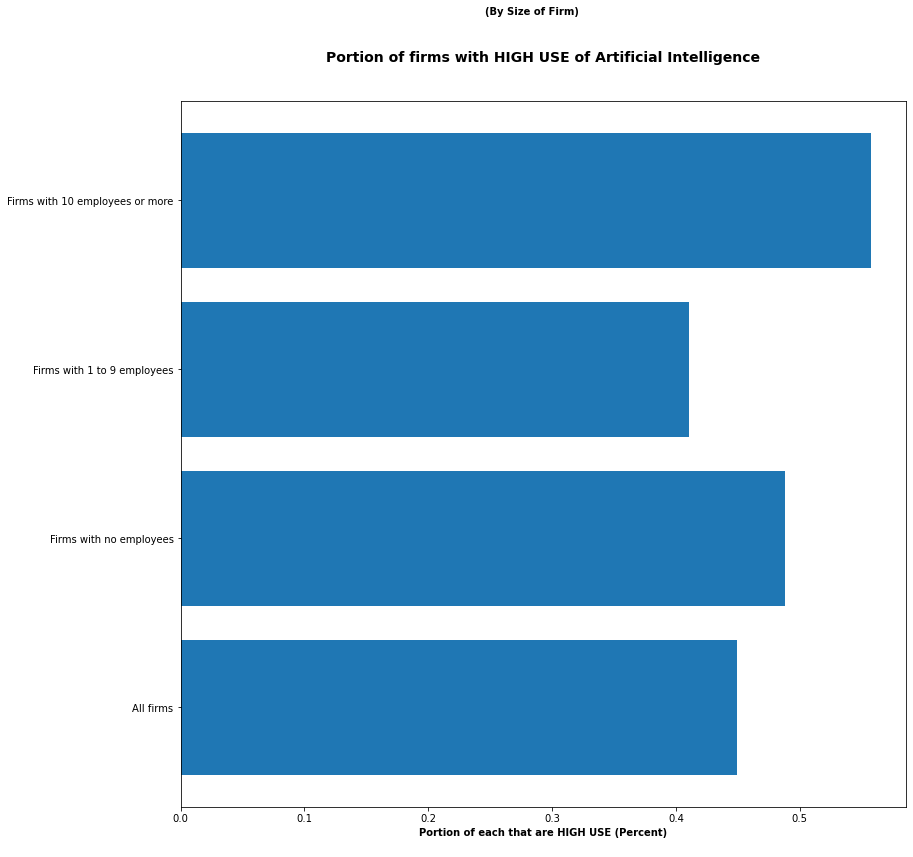

In [132]:
fig, ax = plt.subplots()
ax.barh(TechUseHigh_Size_us_HighUse['NSFSZFI_LABEL'], 
           TechUseHigh_Size_us_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n', fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n\n',
             fontsize=14, fontweight='bold')
fig.suptitle('(By Size of Firm)',
             fontsize=10, fontweight='bold')
plt.show()


## 3. Artificial Intelligence use by Sector
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [133]:
TechUseHigh_Sector_us_HighUse = TechUseHigh_Sector_us[
    TechUseHigh_Sector_us['TECHUSE'] == 'T1E03B05']
TechUseHigh_Sector_us_DontKnow = TechUseHigh_Sector_us[
    TechUseHigh_Sector_us['TECHUSE'] == 'T1E03B06']
TechUseHigh_Sector_us_Total = TechUseHigh_Sector_us[TechUseHigh_Sector_us['TECHUSE'] == 'T1E03BA9']
# Reset all of the indices so the calculation works correctly
TechUseHigh_Sector_us_HighUse.reset_index(drop=True, inplace=True)
TechUseHigh_Sector_us_DontKnow.reset_index(drop=True, inplace=True)
TechUseHigh_Sector_us_Total.reset_index(drop=True, inplace=True)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_Sector_us_HighUse['NORM_FIRMS'] = TechUseHigh_Sector_us_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_Sector_us_Total['FIRMPDEMP'] - TechUseHigh_Sector_us_DontKnow['FIRMPDEMP'])
print(TechUseHigh_Sector_us_HighUse.head())
print(TechUseHigh_Sector_us_HighUse.columns)
print(TechUseHigh_Sector_us_HighUse.info())


    TECHUSE                      TECHUSE_LABEL NAICS2017  \
0  T1E03B05  Artificial Intelligence: High use        00   
1  T1E03B05  Artificial Intelligence: High use        11   
2  T1E03B05  Artificial Intelligence: High use        22   
3  T1E03B05  Artificial Intelligence: High use        21   
4  T1E03B05  Artificial Intelligence: High use        23   

                                 NAICS2017_LABEL  FIRMPDEMP  NORM_FIRMS  
0                          Total for all sectors      20212    0.449265  
1     Agriculture, forestry, fishing and hunting          0    0.000000  
2                                      Utilities          0    0.000000  
3  Mining, quarrying, and oil and gas extraction          9    0.062112  
4                                   Construction       1088    0.187056  
Index(['TECHUSE', 'TECHUSE_LABEL', 'NAICS2017', 'NAICS2017_LABEL', 'FIRMPDEMP',
       'NORM_FIRMS'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
D

C:\Users\Darrell\AppData\Local\Temp\ipykernel_34700\3887038939.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TechUseHigh_Sector_us_HighUse['NORM_FIRMS'] = TechUseHigh_Sector_us_HighUse['FIRMPDEMP']*100/(


### b. Do an exploratory plot of the high AI use by sector

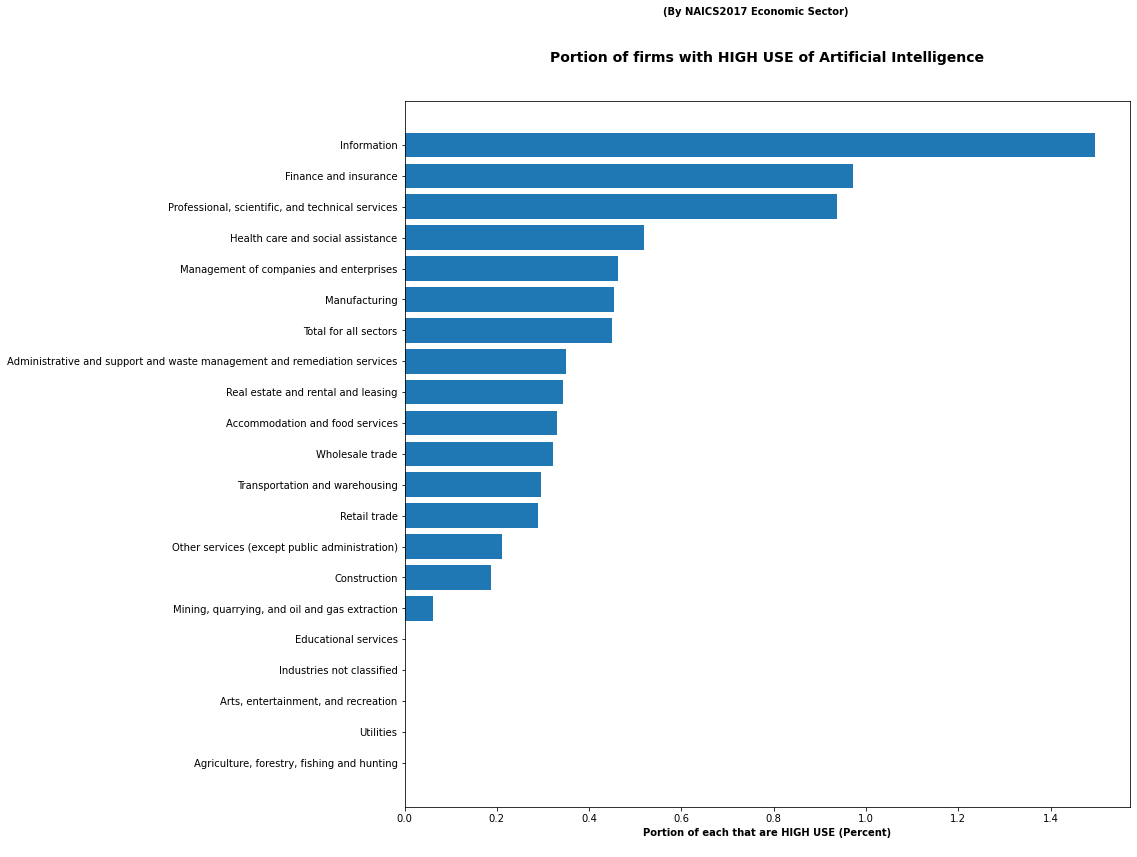

In [134]:
TechUseHigh_Sector_us_HighUse = TechUseHigh_Sector_us_HighUse.sort_values(
    by=['NORM_FIRMS'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_Sector_us_HighUse['NAICS2017_LABEL'],
        TechUseHigh_Sector_us_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n\n',
             fontsize=14, fontweight='bold')
fig.suptitle('(By NAICS2017 Economic Sector)',
             fontsize=10, fontweight='bold')
plt.show()


## 4. Artificial Intelligence use by State
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [135]:
TechUseHigh_state_HighUse = TechUseHigh_state[
    TechUseHigh_state['TECHUSE'] == 'T1E03B05']
TechUseHigh_state_DontKnow = TechUseHigh_state[
    TechUseHigh_state['TECHUSE'] == 'T1E03B06']
TechUseHigh_state_Total = TechUseHigh_state[TechUseHigh_state['TECHUSE'] == 'T1E03BA9']
# Reset all of the indices so the calculation works correctly
TechUseHigh_state_HighUse.reset_index(drop=True, inplace=True)
TechUseHigh_state_DontKnow.reset_index(drop=True, inplace=True)
TechUseHigh_state_Total.reset_index(drop=True, inplace=True)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_state_HighUse['NORM_FIRMS'] = TechUseHigh_state_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_state_Total['FIRMPDEMP'] - TechUseHigh_state_DontKnow['FIRMPDEMP'])
print(TechUseHigh_state_HighUse.head())
print(TechUseHigh_state_HighUse.columns)
print(TechUseHigh_state_HighUse.info())


        State   TECHUSE                      TECHUSE_LABEL  FIRMPDEMP  \
0     Alabama  T1E03B05  Artificial Intelligence: High use        356   
1      Alaska  T1E03B05  Artificial Intelligence: High use         62   
2     Arizona  T1E03B05  Artificial Intelligence: High use        471   
3    Arkansas  T1E03B05  Artificial Intelligence: High use        233   
4  California  T1E03B05  Artificial Intelligence: High use       3383   

  StateCode Region            Division  NORM_FIRMS  
0        AL  South  East South Central    0.664117  
1        AK   West             Pacific    0.511931  
2        AZ   West            Mountain    0.580693  
3        AR  South  West South Central    0.605950  
4        CA   West             Pacific    0.603038  
Index(['State', 'TECHUSE', 'TECHUSE_LABEL', 'FIRMPDEMP', 'StateCode', 'Region',
       'Division', 'NORM_FIRMS'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   

C:\Users\Darrell\AppData\Local\Temp\ipykernel_34700\3961172799.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TechUseHigh_state_HighUse['NORM_FIRMS'] = TechUseHigh_state_HighUse['FIRMPDEMP']*100/(


### b. Do an exploratory plot of the high AI use by state

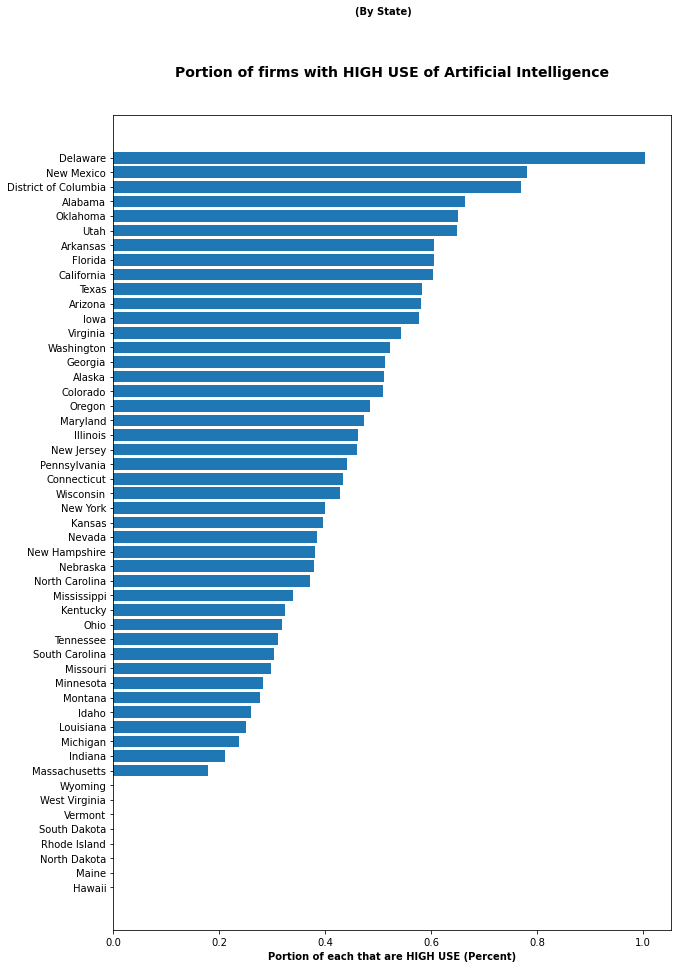

In [136]:
TechUseHigh_state_HighUse = TechUseHigh_state_HighUse.sort_values(
    by=['NORM_FIRMS', 'State'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_state_HighUse['State'],
        TechUseHigh_state_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n\n',
             fontsize=14, fontweight='bold')
fig.suptitle('(By State)',
             fontsize=10, fontweight='bold')
fig.set_figwidth(10)
fig.set_figheight(15)
plt.show()


### c. Do an hexbin map of the high AI use by state

Index(['cartodb_id', 'created_at', 'updated_at', 'label', 'bees', 'iso3166_2',
       'google_name', 'geometry', 'centroid'],
      dtype='object')
Index(['cartodb_id', 'created_at', 'updated_at', 'label', 'bees', 'StateCode',
       'google_name', 'geometry', 'centroid'],
      dtype='object')
Index(['cartodb_id', 'created_at', 'updated_at', 'label', 'bees', 'StateCode',
       'google_name', 'geometry', 'centroid', 'State', 'TECHUSE',
       'TECHUSE_LABEL', 'FIRMPDEMP', 'Region', 'Division', 'NORM_FIRMS'],
      dtype='object')


Text(460, 2, 'Percent')

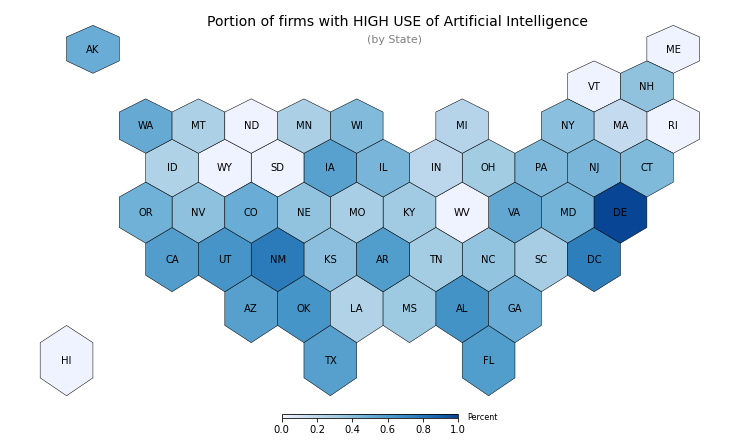

In [140]:
# Import geopandas library
import geopandas as gpd

# Load file
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/us_states_hexgrid.geojson.json"
geoData = gpd.read_file(url)
# Set the plot size for this notebook:
plt.rcParams["figure.figsize"] = 13, 13


# Draw a map with matplotlib
''' geoData.plot(color="white", edgecolor='black', linewidth=.5)
plt.axis('off') '''
# add a "centroid" column with the centroid position of each county
geoData['centroid'] = geoData['geometry'].apply(lambda x: x.centroid)

# join our data to the geoData set
geoData.rename(columns={'iso3166_2': 'StateCode'}, inplace=True)
#print(geoData.head())
print(geoData.columns)
geoDatamerged = geoData.merge(TechUseHigh_state_HighUse, how='inner', on='StateCode')
print(geoDatamerged.columns)


from palettable.colorbrewer.sequential import Blues_7

fig,ax = plt.subplots(1, figsize=(13,13))
# plt.suptitle("Portion of firms with HIGH USE of Artificial Intelligence")
geoDatamerged.plot(ax=ax, 
                   column='NORM_FIRMS', 
                   cmap=Blues_7.mpl_colormap,
                   #norm=plt.Normalize(vmin=2, vmax=13),
                   edgecolor='black',
                   linewidth=0.5)
ax.axis('off')
for idx, row in geoData.iterrows():
    ax.annotate(
        text=row['StateCode'],
        xy=row['centroid'].coords[0],
        horizontalalignment='center',
        va='center',
        color="black"
    )
sm = plt.cm.ScalarMappable(cmap=Blues_7.mpl_colormap)
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
# Add title, subtitle and author
ax.annotate('Portion of firms with HIGH USE of Artificial Intelligence', xy=(200, 400),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate('(by State)', xy=(360, 380),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate('Percent', xy=(460, 2),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=8, color='black')

    


## 5. Artificial Intelligence use by Region
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Group each by Region and sum
3. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [142]:

# Get the sum of the counts over the regions
TechUseHigh_region_HighUse = pd.DataFrame(TechUseHigh_state_HighUse.groupby('Region')[
    'FIRMPDEMP'].sum())
TechUseHigh_region_DontKnow = pd.DataFrame(TechUseHigh_state_DontKnow.groupby('Region')[
    'FIRMPDEMP'].sum())
TechUseHigh_region_Total=pd.DataFrame(TechUseHigh_state_Total.groupby('Region')[
    'FIRMPDEMP'].sum())
print(TechUseHigh_region_HighUse)
print(TechUseHigh_region_HighUse.columns)
print(TechUseHigh_region_DontKnow)
print(TechUseHigh_region_Total)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_region_HighUse['NORM_FIRMS'] = TechUseHigh_region_HighUse['FIRMPDEMP']*100/(
    TechUseHigh_region_Total['FIRMPDEMP'] - TechUseHigh_region_DontKnow['FIRMPDEMP'])
TechUseHigh_region_HighUse.reset_index(drop=False, inplace=True)
print(TechUseHigh_region_HighUse.head())
print(TechUseHigh_region_HighUse.columns)
print(TechUseHigh_region_HighUse.info())


           FIRMPDEMP
Region              
Midwest         3460
Northeast       3107
South           8077
West            6347
Index(['FIRMPDEMP'], dtype='object')
           FIRMPDEMP
Region              
Midwest        57701
Northeast      54982
South          95007
West           68220
           FIRMPDEMP
Region              
Midwest      1077539
Northeast     901102
South        1683454
West         1241194
      Region  FIRMPDEMP  NORM_FIRMS
0    Midwest       3460    0.339270
1  Northeast       3107    0.367206
2      South       8077    0.508484
3       West       6347    0.541103
Index(['Region', 'FIRMPDEMP', 'NORM_FIRMS'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      4 non-null      object 
 1   FIRMPDEMP   4 non-null      int64  
 2   NORM_FIRMS  4 non-null      float64
dtypes: float64(1), int64(1), object(1)

### b. Do an exploratory plot of the high AI use by region.

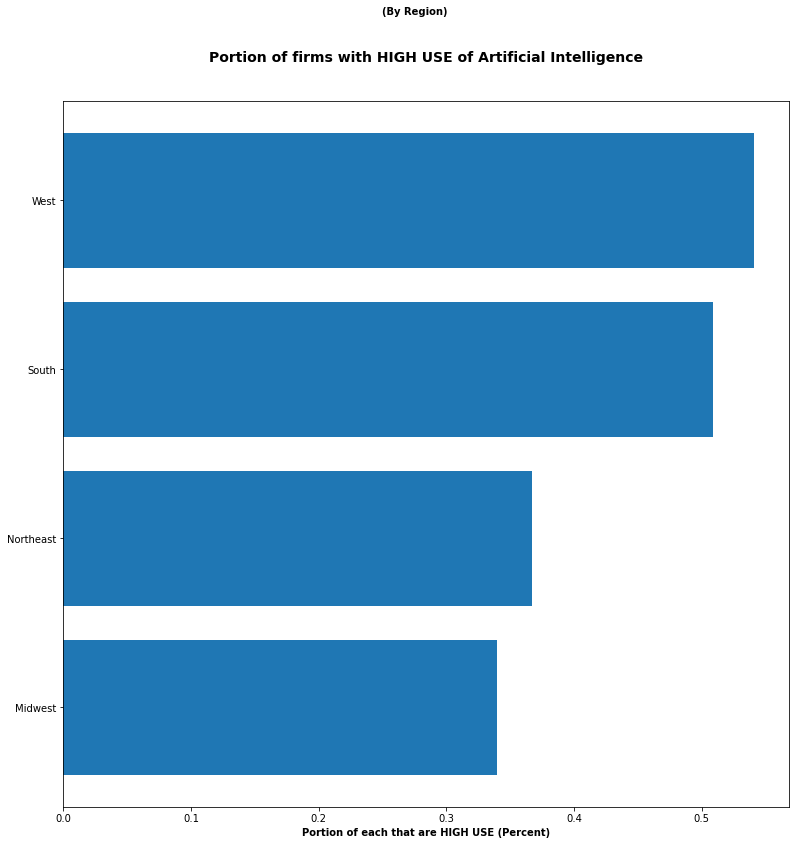

In [143]:
TechUseHigh_region_HighUse = TechUseHigh_region_HighUse.sort_values(
    by=['NORM_FIRMS', 'Region'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_region_HighUse['Region'],
        TechUseHigh_region_HighUse['NORM_FIRMS'])
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n\n',
             fontsize=14, fontweight='bold')
fig.suptitle('(By Region)',
             fontsize=10, fontweight='bold')
plt.show()


### c. Do a plot of the states with just the regional value plotted
1. Merge the regional dataframe back into the state dateframe to give a column of the the normalized regional value for each state
2. Plot the states again but use the normalized regional value for each.

In [152]:
TechUseHigh_state_HighUse = TechUseHigh_state_HighUse.merge(
    TechUseHigh_region_HighUse, how='inner', on='Region')

TechUseHigh_state_HighUse.rename(columns={'NORM_FIRMS_x': 'NORM_FIRMS_STATE', 'NORM_FIRMS_y': 'NORM_FIRMS_REGION'}, inplace=True)
print(TechUseHigh_state_HighUse.head())
print(TechUseHigh_state_HighUse['Region'].unique())


     State   TECHUSE                      TECHUSE_LABEL  FIRMPDEMP_x  \
0   Hawaii  T1E03B05  Artificial Intelligence: High use            0   
1  Wyoming  T1E03B05  Artificial Intelligence: High use            0   
2    Idaho  T1E03B05  Artificial Intelligence: High use           87   
3  Montana  T1E03B05  Artificial Intelligence: High use           76   
4   Nevada  T1E03B05  Artificial Intelligence: High use          142   

  StateCode Region  Division  NORM_FIRMS_STATE  FIRMPDEMP_y  \
0        HI   West   Pacific          0.000000         6347   
1        WY   West  Mountain          0.000000         6347   
2        ID   West  Mountain          0.260292         6347   
3        MT   West  Mountain          0.277879         6347   
4        NV   West  Mountain          0.384428         6347   

   NORM_FIRMS_REGION  FIRMPDEMP  NORM_FIRMS  
0           0.541103       6347    0.541103  
1           0.541103       6347    0.541103  
2           0.541103       6347    0.541103  
3   

Index(['cartodb_id', 'created_at', 'updated_at', 'label', 'bees', 'StateCode',
       'google_name', 'geometry', 'centroid'],
      dtype='object')
Index(['cartodb_id', 'created_at', 'updated_at', 'label', 'bees', 'StateCode',
       'google_name', 'geometry', 'centroid', 'State', 'TECHUSE',
       'TECHUSE_LABEL', 'FIRMPDEMP_x', 'Region', 'Division',
       'NORM_FIRMS_STATE', 'FIRMPDEMP_y', 'NORM_FIRMS_REGION', 'FIRMPDEMP',
       'NORM_FIRMS'],
      dtype='object')
West (3    0.541103
Name: NORM_FIRMS, dtype: float64 + )


Text(460, 2, 'Percent')

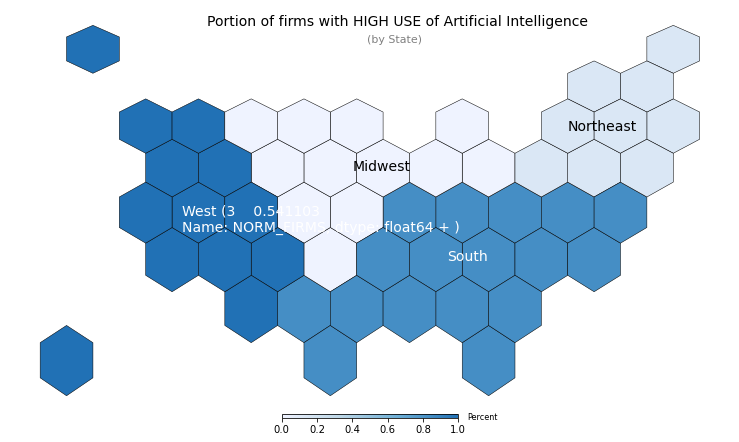

In [167]:

# join our data to the geoData set
print(geoData.columns)
geoDatamerged = geoData.merge(
    TechUseHigh_state_HighUse, how='inner', on='StateCode')
print(geoDatamerged.columns)


from palettable.colorbrewer.sequential import Blues_4

fig,ax = plt.subplots(1, figsize=(13,13))
geoDatamerged.plot(ax=ax, 
                   column='NORM_FIRMS_REGION',
                   cmap=Blues_4.mpl_colormap,
                   #norm=plt.Normalize(vmin=2, vmax=13),
                   edgecolor='black',
                   linewidth=0.5)
ax.axis('off')
# Annotate the regions
WestRegion = 
westText = f"West ({TechUseHigh_region_HighUse[TechUseHigh_region_HighUse['Region'] == 'West']['NORM_FIRMS']} + )"
print(westText)
ax.annotate(text= westText,
            xy=(175, 210), xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='white')
ax.annotate(text='Northeast', xy=(560, 295), xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate(text='Midwest', xy=(345, 255), xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate(text='South', xy=(440, 165), xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='white')

sm = plt.cm.ScalarMappable(cmap=Blues_4.mpl_colormap)
fig.colorbar(sm, orientation="horizontal", aspect=50, fraction=0.005, pad=0)
# Add title, subtitle and author
ax.annotate(text='Portion of firms with HIGH USE of Artificial Intelligence', xy=(200, 400),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
ax.annotate(text='(by State)', xy=(360, 380),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=11, color='#808080')
ax.annotate(text='Percent', xy=(460, 2),  xycoords='axes pixels',
            horizontalalignment='left', verticalalignment='top', fontsize=8, color='black')


## 6. Artificial Intelligence use by Sub-Region
### a. Normalize the responses
1. Separate the three answers to the survey into separate dataframes
2. Group each by Division and sum
3. Create a new column with the 'High Use' normalized to (total responses - don't know).

In [ ]:

# Get the sum of the counts over the divisions
TechUseHigh_subregion_HighUse = pd.DataFrame(TechUseHigh_state_HighUse.groupby('Division')[
    'FIRMPDEMP'].sum())
TechUseHigh_subregion_DontKnow = pd.DataFrame(TechUseHigh_state_DontKnow.groupby('Division')[
    'FIRMPDEMP'].sum())
TechUseHigh_subregion_Total = pd.DataFrame(TechUseHigh_state_Total.groupby('Division')[
    'FIRMPDEMP'].sum())
print(TechUseHigh_subregion_HighUse)
print(TechUseHigh_subregion_HighUse.columns)
print(TechUseHigh_subregion_DontKnow)
print(TechUseHigh_subregion_Total)
# Normalize high AI use to total non-don't-know responses
TechUseHigh_subregion_HighUse['NORM_FIRMS'] = TechUseHigh_subregion_HighUse['FIRMPDEMP']/(
    TechUseHigh_subregion_Total['FIRMPDEMP'] - TechUseHigh_subregion_DontKnow['FIRMPDEMP'])
TechUseHigh_subregion_HighUse.reset_index(drop=False, inplace=True)
print(TechUseHigh_subregion_HighUse.head())
print(TechUseHigh_subregion_HighUse.columns)
print(TechUseHigh_subregion_HighUse.info())


### b. Do an exploratory plot of the high AI use by region.

In [ ]:
TechUseHigh_subregion_HighUse = TechUseHigh_subregion_HighUse.sort_values(
    by=['NORM_FIRMS', 'Division'], ascending=True)
fig, ax = plt.subplots()
ax.barh(TechUseHigh_subregion_HighUse['Division'],
        TechUseHigh_subregion_HighUse['NORM_FIRMS']*100)
ax.set_ylabel = ('')
ax.set_xlabel('Portion of each that are HIGH USE (Percent)\n',
              fontweight='bold')
ax.set_title('Portion of firms with HIGH USE of Artificial Intelligence\n\n',
             fontsize=14, fontweight='bold')
fig.suptitle('(By Sub-Region)',
             fontsize=10, fontweight='bold')
plt.show()


In [ ]:
print(geoData.head())